In [107]:
import os, math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from utils.dataset import load_dataset_v2

In [149]:
file_name_list = os.listdir(os.path.join('data', 'ver_2'))
file_path_list = []

for file_name in file_name_list:
    file_path_list.append(os.path.join('data', 'ver_2', file_name))

dataset= load_dataset_v2(file_path_list)
dataset = dataset[dataset['outlet_flowrate(lpm)'] > 1]
dataset.reset_index(drop=True, inplace=True)

dataset = dataset[::10]
dataset.reset_index(drop=True, inplace=True)

feature_col_name_list = ['pressure_1(bar)', 'main_pressure(bar)']
target_col_name = 'outlet_flowrate(lpm)'

train_data = dataset[dataset['test_case_iter']!=3]
val_data = dataset[dataset['test_case_iter']==3]

train_data = train_data[feature_col_name_list + [target_col_name]]
val_data = val_data[feature_col_name_list + [target_col_name]]

train_data['data_type'] = 'train data'
val_data['data_type'] = 'validation data'

dataset = pd.concat([train_data, val_data])

loading dataset...:   0%|          | 0/84 [00:00<?, ?it/s]

In [150]:
train_data.describe()

,pressure_1(bar),main_pressure(bar),outlet_flowrate(lpm)
count,132560.000000,132560.000000,132560.000000
mean,-0.155419,5.916312,999.994014
std,0.099546,5.759028,478.513498
min,-0.550000,-0.180000,1.010000
25%,-0.220000,2.010000,650.180000
50%,-0.150000,3.130000,1047.185000
75%,-0.100000,7.170000,1400.807500
max,0.410000,22.570000,2075.200000


In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132560 entries, 0 to 194654
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pressure_1(bar)       132560 non-null  float64
 1   main_pressure(bar)    132560 non-null  float64
 2   outlet_flowrate(lpm)  132560 non-null  float64
 3   data_type             132560 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.1+ MB


In [152]:
val_data.describe()

,pressure_1(bar),main_pressure(bar),outlet_flowrate(lpm)
count,64000.000000,64000.000000,64000.000000
mean,-0.157004,6.034524,1003.800100
std,0.096690,5.990122,494.523933
min,-0.540000,-0.160000,1.010000
25%,-0.220000,2.000000,626.850000
50%,-0.150000,3.090000,1051.930000
75%,-0.100000,7.220000,1412.880000
max,0.390000,22.170000,2105.550000


In [153]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 5354 to 196559
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pressure_1(bar)       64000 non-null  float64
 1   main_pressure(bar)    64000 non-null  float64
 2   outlet_flowrate(lpm)  64000 non-null  float64
 3   data_type             64000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.4+ MB


<AxesSubplot:>

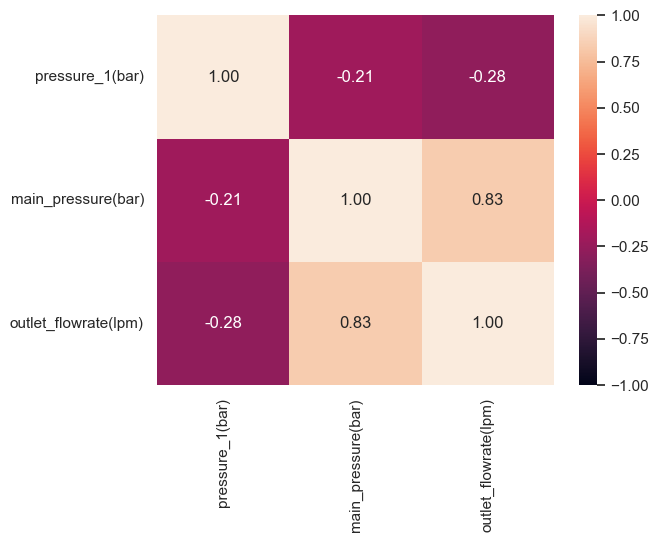

In [154]:
sns.set(font_scale=1.0)
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)

(-0.6, 0.6)

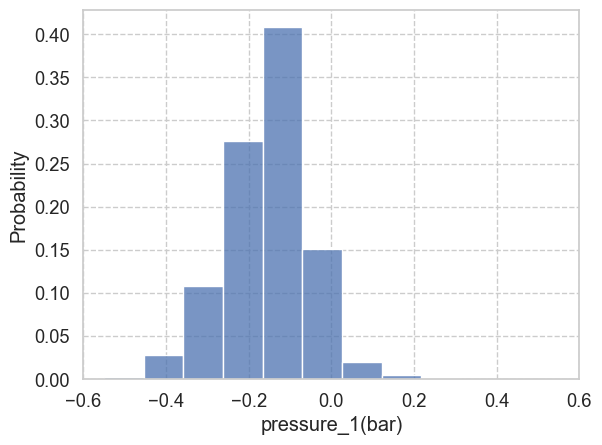

In [155]:
data_name = 'pressure_1(bar)'

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
n_bin = math.ceil((dataset[data_name].max()-dataset[data_name].min())*10)

sns.histplot(dataset[data_name], stat='probability', bins=n_bin)

plt.xlim(-0.6, 0.6)

(0.0, 2500.0)

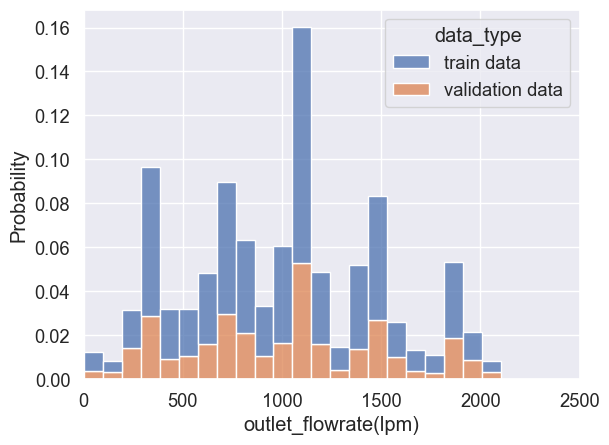

In [157]:
data_name = 'outlet_flowrate(lpm)'

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_theme(style='white')
sns.set(font_scale=1.2)

n_bin = math.ceil((dataset[data_name].max()-dataset[data_name].min())/100)
sns.histplot(data=dataset, x=data_name, hue='data_type', bins=n_bin, multiple='stack', stat='probability')

plt.xlim(0, 2500)

(-0.6, 0.6)

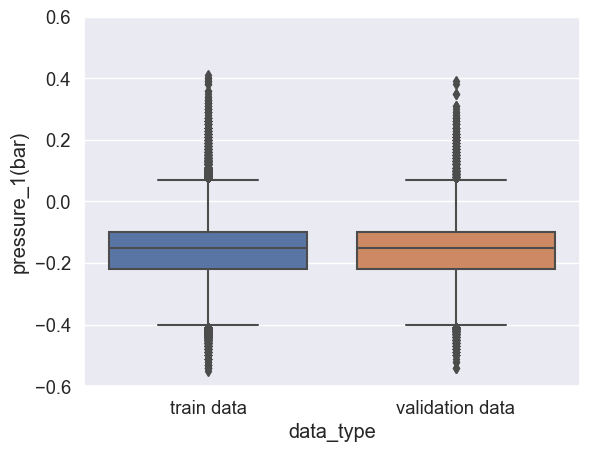

In [166]:
data_name = 'pressure_1(bar)'

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_theme(style='white')
sns.set(font_scale=1.2)

sns.boxplot(data=dataset, x='data_type', y=data_name)

plt.ylim(-0.6, 0.6)

Text(0, 0.5, 'Venturi Pump Outlet Flow-rate(LPM)')

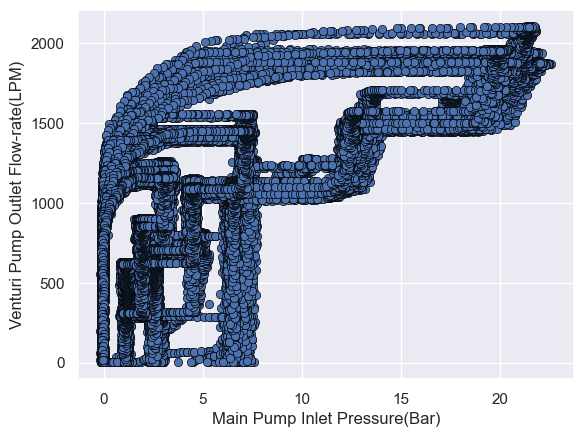

In [168]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_theme(style='dark')
sns.set(font_scale=1)

sns.scatterplot(data=dataset, x='main_pressure(bar)', y='outlet_flowrate(lpm)', edgecolor='black')

plt.xlabel('Main Pump Inlet Pressure(Bar)')
plt.ylabel('Venturi Pump Outlet Flow-rate(LPM)')

Text(0, 0.5, 'Venturi Pump Outlet Flow-rate(LPM)')

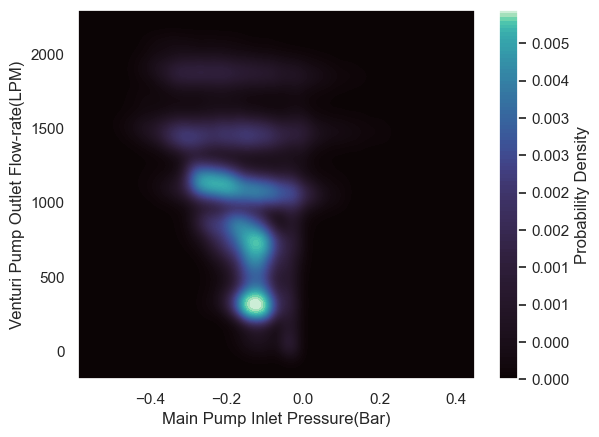

In [116]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_theme(style='dark')
sns.set(font_scale=1)

sns.kdeplot(data=dataset, x='pressure_1(bar)', y='outlet_flowrate(lpm)', thresh=0, levels=100, fill=True, cmap='mako', cbar=True, cbar_kws={'label': 'Probability Density', 'format': '%.3f'})

plt.xlabel('Main Pump Inlet Pressure(Bar)')
plt.ylabel('Venturi Pump Outlet Flow-rate(LPM)')

Text(0, 0.5, 'Venturi Pump Outlet Flow-rate(LPM)')

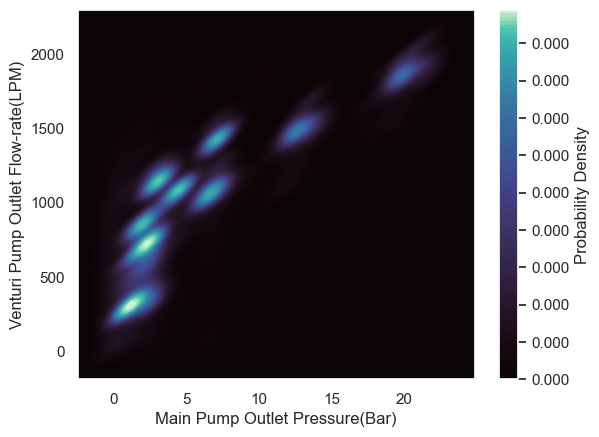

In [117]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_theme(style='dark')
sns.set(font_scale=1.0)

sns.kdeplot(data=dataset, x='main_pressure(bar)', y='outlet_flowrate(lpm)', thresh=0, levels=100, fill=True, cmap='mako', cbar=True, cbar_kws={'label': 'Probability Density', 'format': '%.3f'})

plt.xlabel('Main Pump Outlet Pressure(Bar)')
plt.ylabel('Venturi Pump Outlet Flow-rate(LPM)')